In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

# company data

In [124]:
company = pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [125]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [126]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['US']= label_encoder.fit_transform(company['US']) 
company['Sales']= label_encoder.fit_transform(company['Sales']) 
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,138,73,11,276,120,0,42,17,1,1
1,297,111,48,16,260,83,1,65,10,1,1
2,267,113,35,10,269,80,2,59,12,1,1
3,158,117,100,4,466,97,2,55,14,1,1
4,37,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,320,138,108,17,203,128,1,33,14,1,1
396,114,139,23,3,37,120,2,55,11,0,1
397,159,162,26,12,368,159,2,40,18,1,1
398,106,100,79,7,284,95,0,50,12,1,1


In [127]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int32
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int32
 10  US           400 non-null    int32
dtypes: int32(3), int64(8)
memory usage: 29.8 KB


In [204]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.059040,0.154353,0.288179,0.043045,-0.428046,0.167251,-0.233322,-0.031917,-0.026933,0.183155
CompPrice,0.059040,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.154353,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.288179,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.043045,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.428046,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.167251,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.233322,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.031917,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.026933,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [137]:
x=company.iloc[:,1:11]
y=company['Sales']

In [138]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [139]:
y

0      255
1      297
2      267
3      158
4       37
      ... 
395    320
396    114
397    159
398    106
399    262
Name: Sales, Length: 400, dtype: int64

In [140]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [141]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(320, 10) (80, 10) (320,) (80,)


### company_Building Decision Tree Classifier using Entropy Criteria

In [142]:
model_e = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_e.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [161]:
preds = model_e.predict(x_train) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

223    44
165    42
142    41
74     40
34     40
148    38
135    38
14     37
dtype: int64

In [162]:
preds

array([ 34,  34,  74,  34,  74, 142, 142, 165, 223,  14, 148,  14, 142,
       223,  34, 142, 165, 223, 223, 148,  14,  74, 148, 142,  74,  34,
        74,  34, 148, 223, 135, 165, 223, 142,  74, 148, 135, 165, 223,
       165,  14, 135,  34, 142, 148, 135, 165, 135, 148, 148,  74, 135,
        14,  74,  14, 135, 223, 135, 165, 142,  74,  34, 142, 165, 223,
       148,  14, 148, 148, 142, 223,  74,  14,  34, 165, 142, 165,  74,
       142, 142, 165, 135, 135, 135, 165,  34, 165, 148, 135, 148, 165,
       223, 148, 165, 148,  34, 223, 223,  74, 135, 148,  34, 223, 135,
       148, 165, 165, 142,  74,  34, 165, 148, 223,  14, 223,  14, 223,
       148, 223,  14, 142, 223, 142,  34,  14, 223, 135, 142,  14, 135,
       148,  14, 223, 142, 135, 165, 135,  34, 223, 135, 142,  34, 165,
        34, 148,  14, 223, 142, 135, 223,  34, 165,  34,  34, 165,  34,
       223,  34,  14,  34,  14, 165, 135, 148,  74,  74,  34,  34, 135,
       223, 148, 142, 135,  34,  74, 142, 148, 148, 148, 165, 14

In [163]:
pd.crosstab(y_train,preds)

col_0,14,34,74,135,142,148,165,223
Sales,,,,,,,,
0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
330,0,1,0,0,0,0,0,0
332,0,0,0,0,0,0,1,0
333,0,0,0,0,1,0,0,0


In [164]:
np.mean(preds==y_train)

0.053125

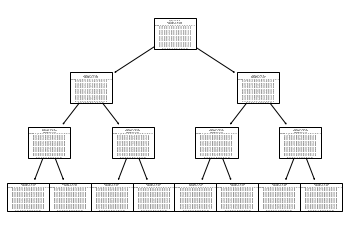

In [154]:
from sklearn import tree
tree.plot_tree(model_e);

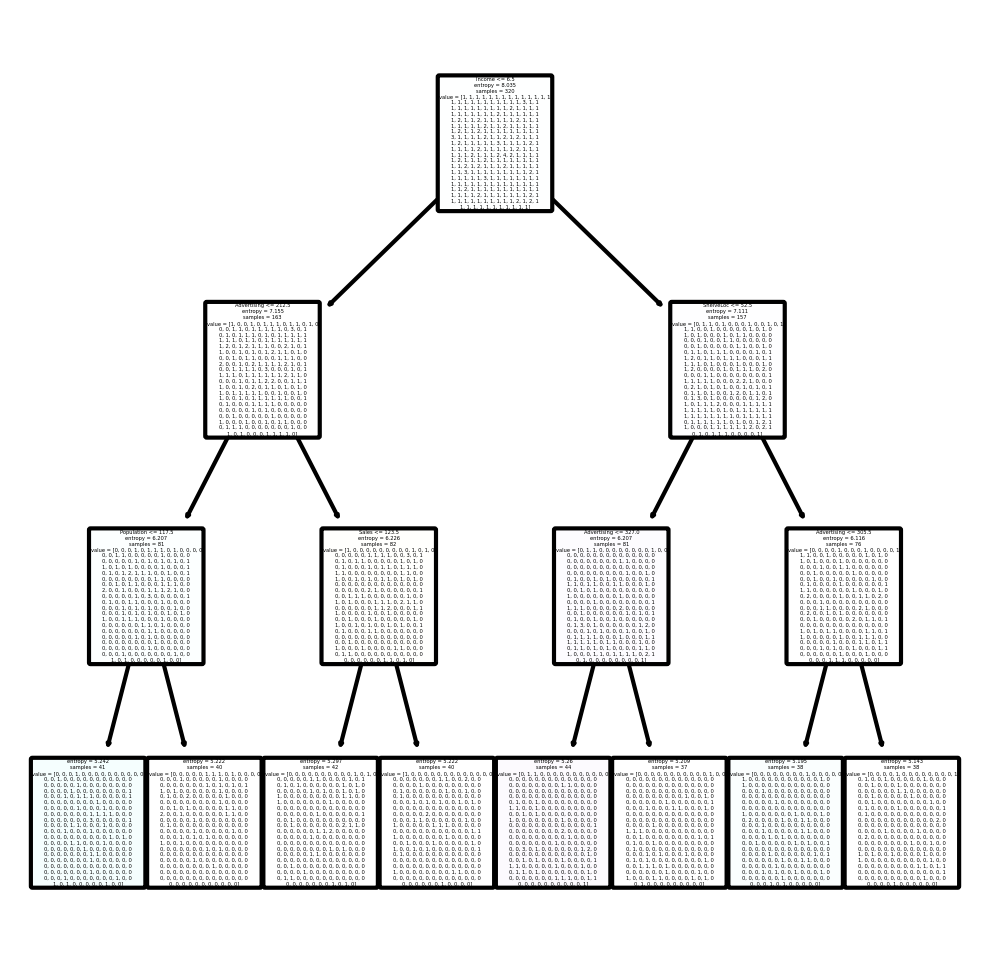

In [155]:
import matplotlib.pyplot as plt
fn=['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['y']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_e, feature_names = fn, filled = True, rounded=True);

In [72]:
# from above decision tree, we can say that sales is depend on Income, advertising, ShelveLoc and population mostly

##### company_Building Decision Tree Classifier using Gini Criteria

In [169]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [170]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [171]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
pred

array([183, 183, 183, 184, 183, 183, 184,   4, 183, 178, 183, 183, 184,
       183, 183, 183,  38, 183, 184, 183, 183, 183, 183, 184, 183, 183,
       184, 183, 183, 183, 243, 183, 178, 183, 184, 183, 183, 183, 183,
       183, 183, 183, 183, 183, 183, 183, 183, 184, 183, 184, 183, 183,
       183, 183, 183, 178, 184, 183, 178, 183, 183, 183, 243, 183, 183,
       183, 184, 183, 183, 183, 183, 184, 184, 183, 183, 183, 183, 183,
       184, 183], dtype=int64)

In [172]:
np.mean(pred==y_test)

0.0

# Fraud check

In [173]:
fraud_df=pd.read_csv('fraud_check.csv')
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [174]:
fraud_df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [175]:
# as Work Experience column is not much related in data, by removing it we have:
fraud_df1=fraud_df.drop(['Work.Experience'],axis='columns')
fraud_df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Urban
0,NO,Single,68833,50047,YES
1,YES,Divorced,33700,134075,YES
2,NO,Married,36925,160205,YES
3,YES,Single,50190,193264,YES
4,NO,Married,81002,27533,NO
...,...,...,...,...,...
595,YES,Divorced,76340,39492,YES
596,YES,Divorced,69967,55369,YES
597,NO,Divorced,47334,154058,YES
598,YES,Married,98592,180083,NO


In [176]:
fraud=fraud_df1.rename(columns={'Marital.Status':'maritalstatus','Taxable.Income':'taxableincome','City.Population':'citypopulation'},inplace=False)

In [177]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['maritalstatus']= label_encoder.fit_transform(fraud['maritalstatus']) 
fraud['Urban']= label_encoder.fit_transform(fraud['Urban']) 
fraud

,Undergrad,maritalstatus,taxableincome,citypopulation,Urban
0,0,2,68833,50047,1
1,1,0,33700,134075,1
2,0,1,36925,160205,1
3,1,2,50190,193264,1
4,0,1,81002,27533,0
...,...,...,...,...,...
595,1,0,76340,39492,1
596,1,0,69967,55369,1
597,0,0,47334,154058,1
598,1,1,98592,180083,0


In [178]:
conditions = [
    (fraud['taxableincome'] <= 30000),
    (fraud['taxableincome'] > 30000)]

# create a list of the values we want to assign for each condition
values = ['risky','good']

# create a new column and use np.select to assign values to it using our lists as arguments
fraud['category'] = np.select(conditions, values)

# display updated DataFrame
fraud.head()

,Undergrad,maritalstatus,taxableincome,citypopulation,Urban,category
0,0,2,68833,50047,1,good
1,1,0,33700,134075,1,good
2,0,1,36925,160205,1,good
3,1,2,50190,193264,1,good
4,0,1,81002,27533,0,good


In [179]:
# as we convert taxableincome into category, by droping taxableincome
fraud_new=fraud.drop(['taxableincome'],axis='columns')
fraud_new

,Undergrad,maritalstatus,citypopulation,Urban,category
0,0,2,50047,1,good
1,1,0,134075,1,good
2,0,1,160205,1,good
3,1,2,193264,1,good
4,0,1,27533,0,good
...,...,...,...,...,...
595,1,0,39492,1,good
596,1,0,55369,1,good
597,0,0,154058,1,good
598,1,1,180083,0,good


In [180]:
x=fraud_new.iloc[:,[True, True,True, True, False]]
x

,Undergrad,maritalstatus,citypopulation,Urban
0,0,2,50047,1
1,1,0,134075,1
2,0,1,160205,1
3,1,2,193264,1
4,0,1,27533,0
...,...,...,...,...
595,1,0,39492,1
596,1,0,55369,1
597,0,0,154058,1
598,1,1,180083,0


In [181]:
abs(x.corr())

,Undergrad,maritalstatus,citypopulation,Urban
Undergrad,1.000000,0.042407,0.079579,0.000267
maritalstatus,0.042407,1.000000,0.001564,0.064562
citypopulation,0.079579,0.001564,1.000000,0.040098
Urban,0.000267,0.064562,0.040098,1.000000


In [182]:
x.var()

Undergrad         2.500167e-01
maritalstatus     6.756149e-01
citypopulation    2.485030e+09
Urban             2.504062e-01
dtype: float64

In [183]:
# another method to get x
x1=fraud_new.iloc[:,lambda fraud: [0,1,2,3]]
x1

,Undergrad,maritalstatus,citypopulation,Urban
0,0,2,50047,1
1,1,0,134075,1
2,0,1,160205,1
3,1,2,193264,1
4,0,1,27533,0
...,...,...,...,...
595,1,0,39492,1
596,1,0,55369,1
597,0,0,154058,1
598,1,1,180083,0


In [184]:
# another method to get x
x2=fraud_new.iloc[:,0:4]
x2

,Undergrad,maritalstatus,citypopulation,Urban
0,0,2,50047,1
1,1,0,134075,1
2,0,1,160205,1
3,1,2,193264,1
4,0,1,27533,0
...,...,...,...,...
595,1,0,39492,1
596,1,0,55369,1
597,0,0,154058,1
598,1,1,180083,0


In [185]:
y=fraud_new.iloc[:,4]
y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: category, Length: 600, dtype: object

### fraud_Building Decision Tree Classifier using Entropy Criteria

In [186]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

In [188]:
model.score(x_test,y_test)

1.0

In [189]:
# lets check first row
preds = model.predict([[0,2,10,1]])
preds

array(['good'], dtype=object)

In [190]:
# lets check random data
preds = model.predict([[1,3,20,0]])
preds

array(['risky'], dtype=object)

In [191]:
# lets check random data
preds = model.predict([[6,9,5,7]])
preds

array(['risky'], dtype=object)

### fraud_Building Decision Tree using regression

In [192]:
label_encoder = preprocessing.LabelEncoder()
fraud['category']= label_encoder.fit_transform(fraud['category']) 
fraud['category'].value_counts()

0    476
1    124
Name: category, dtype: int64

In [193]:
y1=fraud['category']
y1

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: category, Length: 600, dtype: int32

In [194]:
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.30, random_state=30)

In [195]:
from sklearn.tree import  DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3)
model.fit(x,y1)

DecisionTreeRegressor(max_depth=3)

In [196]:
#accuracy
model.score(x_test,y1_test)

0.07495004947569672

In [197]:
preds = model.predict(x_test)
preds

array([0.23674912, 0.23674912, 0.17714286, 0.23674912, 0.17714286,
       0.17714286, 0.23674912, 0.23674912, 0.23674912, 0.17714286,
       0.17714286, 0.17714286, 0.17714286, 0.23674912, 0.23674912,
       0.23674912, 0.13793103, 0.17714286, 0.12307692, 0.23674912,
       0.12307692, 0.17714286, 0.23674912, 0.23674912, 0.23674912,
       0.17714286, 0.23674912, 0.23674912, 0.34482759, 0.23674912,
       0.23674912, 0.23674912, 0.23674912, 0.17714286, 0.23674912,
       0.17714286, 0.17714286, 0.17714286, 0.17714286, 0.        ,
       0.23674912, 0.12307692, 0.23674912, 0.        , 0.23674912,
       0.13793103, 0.34482759, 0.23674912, 0.23674912, 0.23674912,
       0.17714286, 0.23674912, 0.23674912, 0.17714286, 0.12307692,
       0.17714286, 0.23674912, 0.23674912, 0.12307692, 0.23674912,
       0.34482759, 0.23674912, 0.17714286, 0.17714286, 0.17714286,
       0.23674912, 0.13793103, 0.23674912, 0.23674912, 0.23674912,
       0.17714286, 0.23674912, 0.23674912, 1.        , 0.12307

In [198]:
preds1 = model.predict([[2,11,2,8]])
preds1

array([0.13793103])

In [199]:
if preds1<= 30000:
    print('Risky')
else:
    print('Good')

Risky


In [200]:
preds2 = model.predict([[8,3,3,3]])

if preds2<= 30000:
    print('Risky',preds2)
else:
    print('Good',preds2)

Risky [0.13793103]


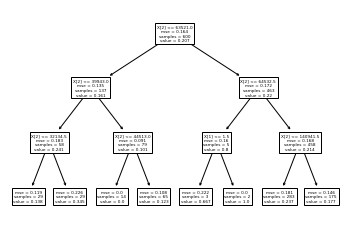

In [201]:
tree.plot_tree(model);

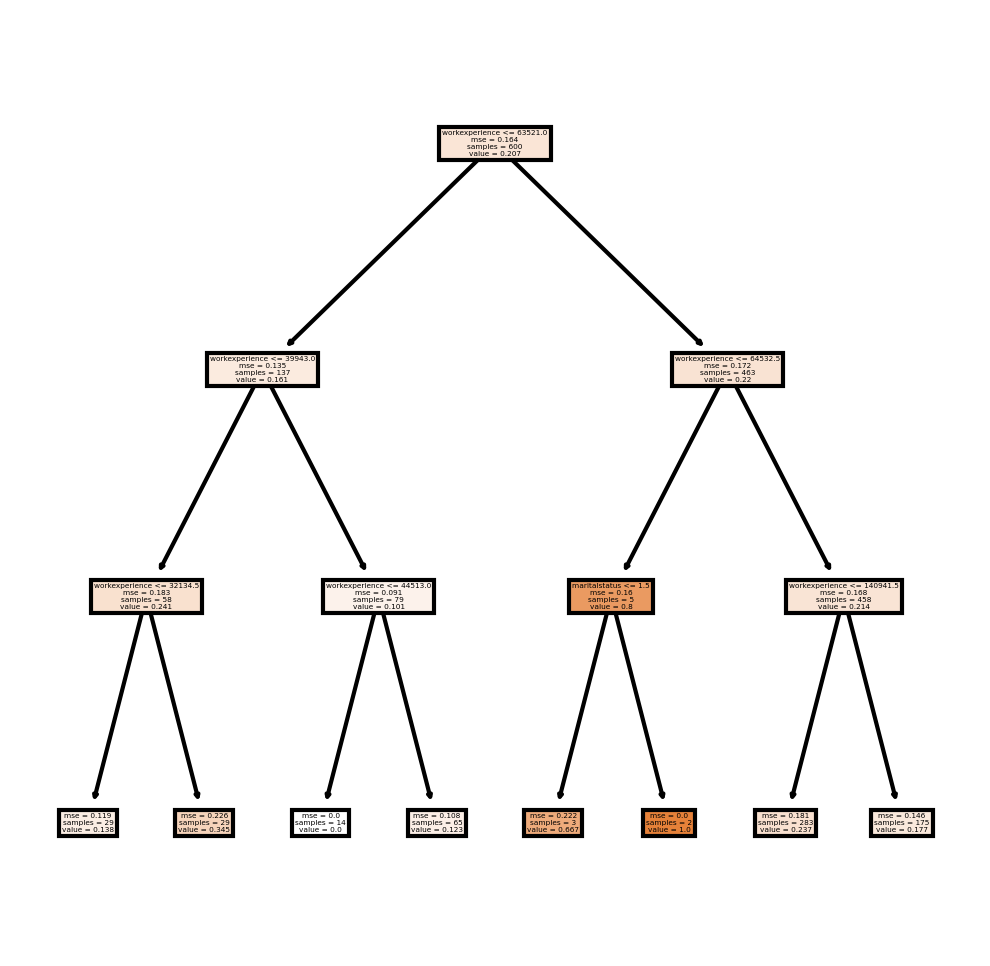

In [202]:
import matplotlib.pyplot as plt
fn=['Undergrad','maritalstatus','workexperience','Urban']
cn=['y']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);